In [32]:
import pandas as pd
import numpy as np
import tifffile
import math
from pandas import DataFrame as df
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy import interpolate
import seaborn as sns
import statsmodels.stats.weightstats as st
from scipy import stats
from scipy.stats import ks_2samp

In [3]:
sandorg_perm = pd.read_table('sandorg_permeability.txt',sep='\t',header=None)
sandorg_porosity = pd.read_table('sandorg_porosity.txt',sep='\t',header=None)
sandsyn_perm = pd.read_table('sandsyn_permeability.txt',sep='\t',header=None)
sandsyn_porosity = pd.read_table('sandsyn_porosity.txt',sep='\t',header=None)
soilorg_perm = pd.read_table('soilorg_permeability.txt',sep='\t',header=None)
soilorg_porosity = pd.read_table('soilorg_porosity.txt',sep='\t',header=None)
soilsyn_perm = pd.read_table('soilsyn_permeability.txt',sep='\t',header=None)
soilsyn_porosity = pd.read_table('soilsyn_porosity.txt',sep='\t',header=None)

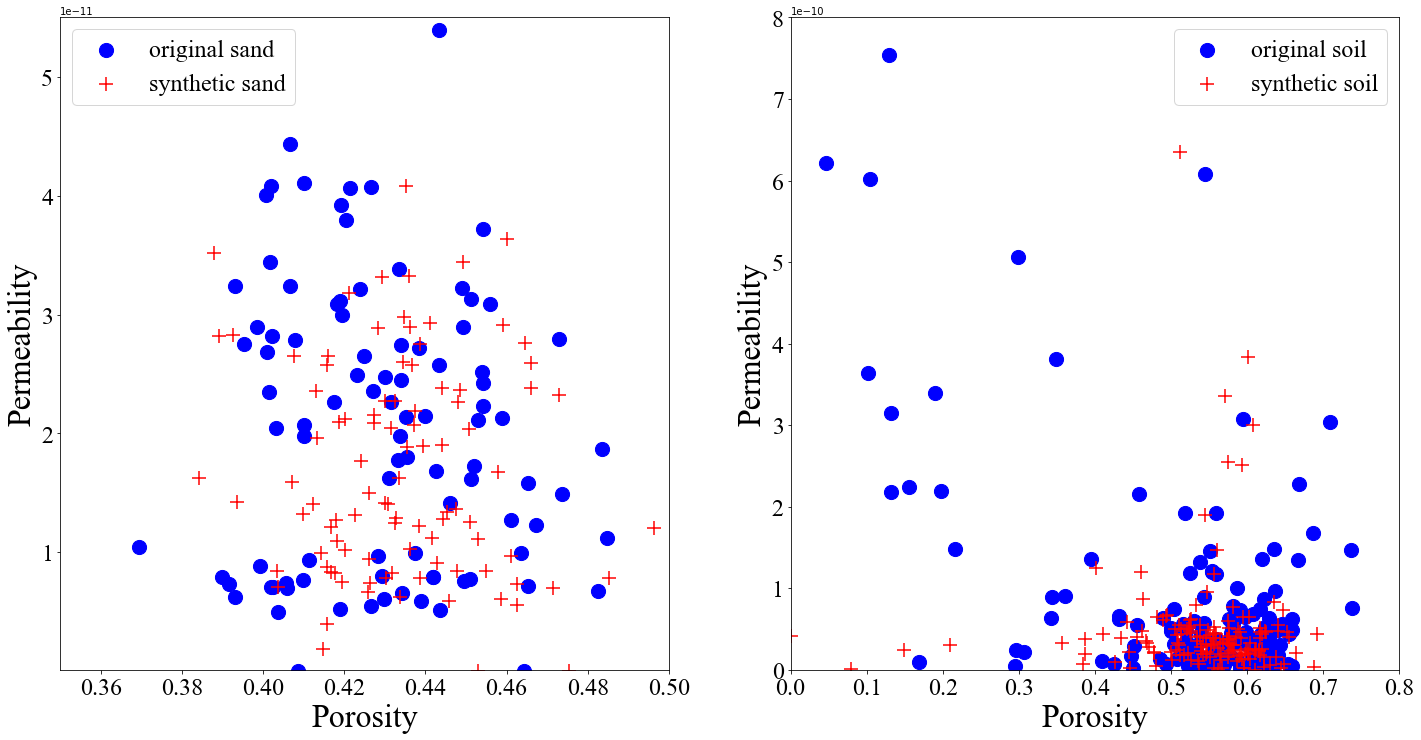

In [4]:
font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=24)

fig, ax = plt.subplots(1, 1, figsize=(24,12))
plt.subplot(121)
ax = plt.gca()
plt.scatter(sandorg_porosity, sandorg_perm, c="b", marker="o", s=200, label="original sand")
plt.scatter(sandsyn_porosity, sandsyn_perm, c="r", marker="+", s=200, label="synthetic sand")
#plt.suptitle("Sand",x=0.3, y=0.95, fontproperties="Times New Roman",fontsize=32)
plt.ticklabel_format(style='sci', axis='y')
plt.xticks(fontproperties="Times New Roman",fontsize=24)
plt.yticks(fontproperties="Times New Roman",fontsize=24)
plt.xlim(0.35, 0.5)
plt.ylim(1e-13, 5.5e-11)
plt.xlabel('Porosity', fontproperties="Times New Roman",fontsize=32) 
plt.ylabel('Permeability', fontproperties="Times New Roman",fontsize=32)
ax.yaxis.major.formatter.set_powerlimits((0,0))
plt.legend(loc='upper left',prop=font)

plt.subplot(122)
ax = plt.gca()
plt.scatter(soilorg_porosity, soilorg_perm, c="b", marker="o", s=200, label="original soil")
plt.scatter(soilsyn_porosity, soilsyn_perm, c="r", marker="+", s=200, label="synthetic soil")
#plt.suptitle("Soil",x=0.6, y=0.95, fontproperties="Times New Roman",fontsize=32)
plt.ticklabel_format(style='sci', axis='y')
plt.xticks(fontproperties="Times New Roman",fontsize=24)
plt.yticks(fontproperties="Times New Roman",fontsize=24)
plt.xlim(0, 0.8)
plt.ylim(0, 8e-10)
plt.xlabel('Porosity', fontproperties="Times New Roman",fontsize=32) 
plt.ylabel('Permeability', fontproperties='Times New Roman',fontsize=32)
ax.yaxis.major.formatter.set_powerlimits((0,0))
plt.legend(loc='upper right',prop=font)

fig.savefig("perm.jpg", dpi=300)

In [24]:
# 对样本数据进行独立样本t检验
sandorg_perm = np.array(sandorg_perm).flatten()
sandsyn_perm = np.array(sandsyn_perm).flatten()

#Levene's方差齐性检验(α=0.05)
W, levene_P = stats.levene(sandorg_perm, sandsyn_perm, center='mean')
print("Levene's方差齐性检验的W统计量为" + str(W))
print("Levene's方差齐性检验的P值为" + str(levene_P))

Levene's方差齐性检验的W统计量为4.123076827441295
Levene's方差齐性检验的P值为0.04363263045164622


In [25]:
# 假设检验
t, p_two, df = st.ttest_ind(sandorg_perm, sandsyn_perm)

print('t=' + str(t))
print('P值=' + str(p_two))
print('自由度=' + str(df))

t=1.0050128171923185
P值=0.3161111497619308
自由度=199.0


In [27]:
# 对样本数据进行独立样本t检验
soilorg_perm = np.array(soilorg_perm).flatten()
soilsyn_perm = np.array(soilsyn_perm).flatten()

#Levene's方差齐性检验(α=0.05)
W, levene_P = stats.levene(soilorg_perm, soilsyn_perm, center='mean')
print("Levene's方差齐性检验的W统计量为" + str(W))
print("Levene's方差齐性检验的P值为" + str(levene_P))

Levene's方差齐性检验的W统计量为4.30036766861662
Levene's方差齐性检验的P值为0.03894313524758399


In [28]:
# 假设检验
t, p_two, df = st.ttest_ind(soilorg_perm, soilsyn_perm)

print('t=' + str(t))
print('P值=' + str(p_two))
print('自由度=' + str(df))

t=1.029860539099308
P值=0.3038914633244597
自由度=305.0


In [34]:
KS = scipy.stats.ks_2samp(soilorg_perm, soilsyn_perm)
print(KS)

KstestResult(statistic=0.21242885056494776, pvalue=0.0015709610668539487)


In [35]:
KS = scipy.stats.ks_2samp(sandorg_perm, sandsyn_perm)
print(KS)

KstestResult(statistic=0.19247524752475248, pvalue=0.042835872531286956)
